In [1]:
# pandas for data structures and operations for manipulating numerical tables and time series
%%writefile mywebapp.py
#This is the file that we will create. It contains the necessary code to display our desired results.
# import class Flask, apscheduler and other necessary libraries.
from flask import Flask, render_template, request, redirect, url_for
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot fordata plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# from utilities import visualize_classifier

import numpy as np

In [2]:
dataset = pd.read_csv('pmdata/BeijingPM.csv')

In [3]:
dataset.shape

(52584, 18)

In [4]:
# Clean the data
np.nan_to_num(dataset)
# dataset = dataset[isnan(dataset)]
dataset[dataset.notnull()]
dataset = dataset.dropna()

In [5]:
dataset.head(5)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
27824,27825,2013,3,5,8,1,117.0,166.0,140.0,150.0,-6.0,59.0,1019.0,1.0,cv,0.89,0.0,0.0
27825,27826,2013,3,5,9,1,131.0,165.0,152.0,163.0,-8.0,38.0,1019.0,5.0,cv,1.78,0.0,0.0
27826,27827,2013,3,5,10,1,141.0,173.0,128.0,172.0,-8.0,31.0,1018.0,8.0,cv,2.67,0.0,0.0
27828,27829,2013,3,5,12,1,169.0,182.0,3.0,181.0,-9.0,23.0,1017.0,11.0,cv,4.45,0.0,0.0
27829,27830,2013,3,5,13,1,169.0,169.0,3.0,187.0,-9.0,22.0,1015.0,12.0,cv,5.34,0.0,0.0


In [6]:
print(dataset.describe())

                 No          year         month           day          hour  \
count  19062.000000  19062.000000  19062.000000  19062.000000  19062.000000   
mean   38690.029693   2013.925244      6.402476     15.419736     11.476026   
std     6327.149539      0.761684      3.316618      8.723040      6.955963   
min    27825.000000   2013.000000      1.000000      1.000000      0.000000   
25%    33371.250000   2013.000000      4.000000      8.000000      5.000000   
50%    38606.500000   2014.000000      6.000000     15.000000     11.000000   
75%    43937.750000   2015.000000      9.000000     23.000000     18.000000   
max    52583.000000   2015.000000     12.000000     31.000000     23.000000   

             season     PM_Dongsi  PM_Dongsihuan  PM_Nongzhanguan  \
count  19062.000000  19062.000000   19062.000000     19062.000000   
mean       2.347865     86.627321      92.264033        85.659532   
std        1.122671     82.953394      87.706631        83.510634   
min        1

In [7]:
# Draw box-whisker plots
# dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
# plt.show()

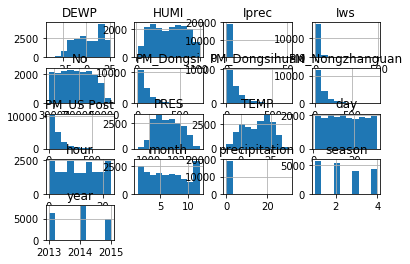

In [8]:
# Draw histograms
dataset.hist()
plt.show()

In [9]:
dataset.corr()['TEMP'].sort_values()

PRES              -0.821049
season            -0.530078
PM_US Post        -0.210023
PM_Nongzhanguan   -0.182110
PM_Dongsihuan     -0.175545
Iws               -0.138815
PM_Dongsi         -0.129857
year              -0.063512
No                -0.024631
day                0.025575
precipitation      0.042680
Iprec              0.043737
HUMI               0.102901
month              0.111249
hour               0.173795
DEWP               0.798850
TEMP               1.000000
Name: TEMP, dtype: float64

In [10]:
#seperating the predicting column from the whole dataset 
X = dataset[['year','month','hour', 'DEWP', 'HUMI']]
X = X[:-1]
y = dataset[['TEMP']]
y = y[:-1]

In [11]:
# Split into train and test
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

In [12]:
#Create Forest
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_4 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
# Predict the output
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

In [15]:
# Compute performance metrics
print("Decision Tree regressor performance:")
print (regr_1.score(X_test, y_test))
print (regr_2.score(X_test, y_test))
print (regr_3.score(X_test, y_test))
print (regr_3.score(X_test, y_test))

Decision Tree regressor performance:
0.6113651535619793
0.7877843247711069
0.9300428925832442
0.9300428925832442


In [17]:
y_test_pred_my1 = regr_1.predict([[2016, 11, 6, 21, 54]])
y_test_pred_my2 = regr_2.predict([[2016, 11, 6, 21, 54]])
y_test_pred_my3 = regr_3.predict([[2016, 11, 6, 21, 54]])
y_test_pred_my4 = regr_4.predict([[2016, 11, 6, 21, 54]])
print("Temperature from first prediction: ", y_test_pred_my1)
print("Temperature from second prediction: ", y_test_pred_my2)
print("Temperature from third prediction: ", y_test_pred_my3)
print("Temperature from fourth prediction: ", y_test_pred_my4)

Temperature from first prediction:  [25.66034985]
Temperature from second prediction:  [27.80115274]
Temperature from third prediction:  [28.13300971]
Temperature from fourth prediction:  [30.45738636]
